In [ ]:
Imports:

In [2]:
import matplotlib.pyplot as plt
import csv
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np


In [3]:
def smooth(signal, window_size):
    pad_left = (window_size - 1) // 2
    pad_right = window_size // 2
    
    padded_signal = np.pad(signal, (pad_left, pad_right), mode='edge')
    
    return np.convolve(padded_signal, np.ones(window_size)/window_size, mode='valid')

def norm(signal):
    return signal / np.max(signal)

SyntaxError: invalid syntax (485875364.py, line 1)

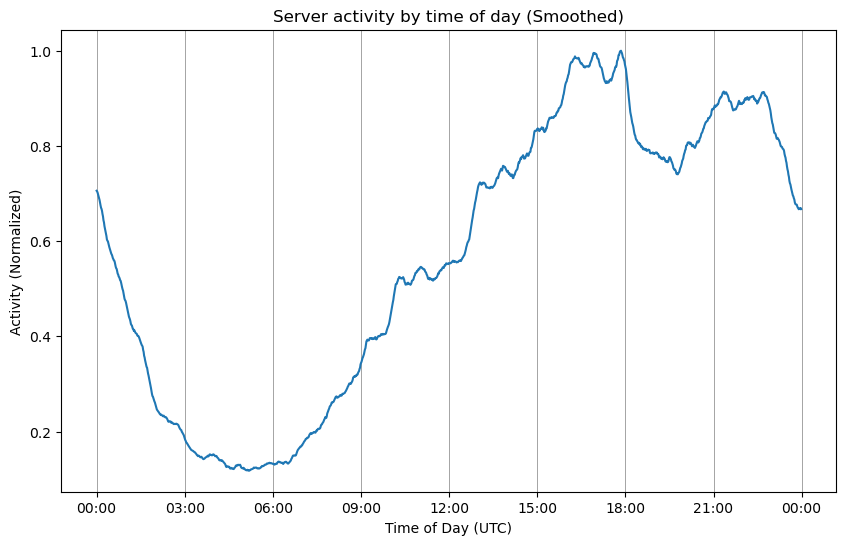

In [25]:
times = []
counts = []

with open("./../computed/messages_by_time_of_day.csv", "r") as f:
  reader = csv.DictReader(f)
  for row in reader:
    times.append(datetime.strptime(row['time'], "%H:%M"))
    counts.append(int(row['count']))


window_size = 20
cleaned_counts = norm(smooth(counts, window_size))

plt.figure(figsize=(10, 6))
plt.plot(times, cleaned_counts)

plt.title("Server activity by time of day (Smoothed)")
plt.xlabel("Time of Day (UTC)")
plt.ylabel("Activity (Normalized)")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show one tick per hour
# plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))  # Show minor ticks every 30 minutes

plt.grid(True, which='both', axis='x', color='gray', linestyle='-', linewidth=0.5)
plt.show()


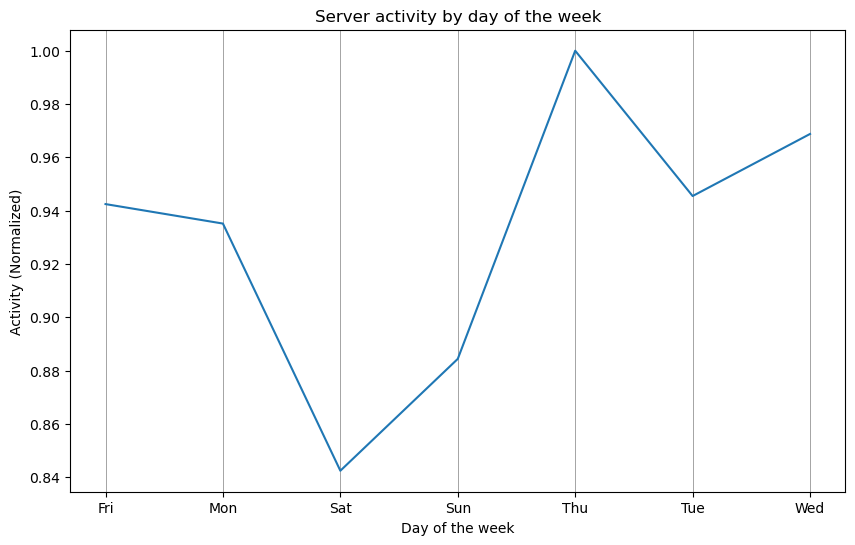

In [26]:
days = []
counts = []

with open("./../computed/messages_by_day_of_week.csv", "r") as f:
  reader = csv.DictReader(f)
  for row in reader:
    days.append(row['day'])
    counts.append(int(row['count']))

normalized_counts = norm(counts)

plt.figure(figsize=(10, 6))
plt.plot(days, normalized_counts)

plt.title("Server activity by day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Activity (Normalized)")

plt.grid(True, which='both', axis='x', color='gray', linestyle='-', linewidth=0.5)
plt.show()


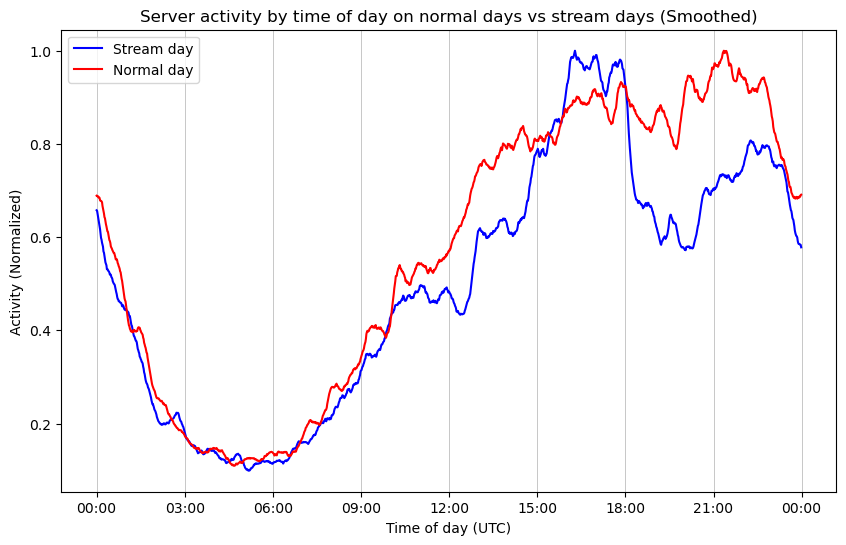

In [23]:
time = []
counts_strem = []
counts_non_strem = []

with open("./../computed/strem_vs_non_strem.csv", "r") as f:
  reader = csv.DictReader(f)
  for row in reader:
    time.append(datetime.strptime(row['time'], "%H:%M"))
    counts_strem.append(int(row['stremday']))
    counts_non_strem.append(int(row['nonstremday']))



                          
window_size = 20
counts_strem_cleaned = norm(smooth(counts_strem, window_size))
counts_non_strem_cleaned = norm(smooth(counts_non_strem, window_size))




plt.figure(figsize=(10, 6))
plt.plot(time, counts_strem_cleaned, color="blue", label = "Stream day")
plt.plot(time, counts_non_strem_cleaned, color="red", label = "Normal day")
plt.legend()

plt.title("Server activity by time of day on normal days vs stream days (Smoothed)")
plt.xlabel("Time of day (UTC)")
plt.ylabel("Activity (Normalized)")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.grid(True, which='both', axis='x', linestyle='-', linewidth=0.5)
plt.show()

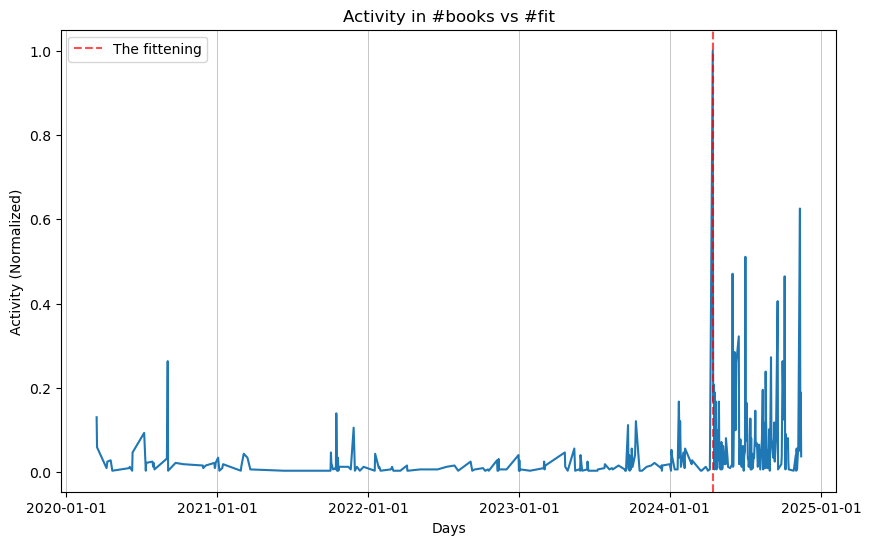

In [44]:
dates = []
counts = []

with open("./../computed/fit_vs_books.csv", "r") as f:
  reader = csv.DictReader(f)
  for row in reader:
    dates.append(datetime.strptime(row['time'], "%Y-%m-%d"))
    counts.append(int(row['count']))


the_fittening = datetime.strptime('2024-04-14', "%Y-%m-%d")

window_size = 1
counts_cleaned = norm(smooth(counts, window_size))

plt.figure(figsize=(10, 6))
plt.plot(dates, counts_cleaned)
plt.axvline(x=the_fittening, color='r', linestyle='--', label='The fittening', alpha=0.7)
plt.legend()
plt.title("Activity in #books vs #fit")
plt.xlabel("Days")
plt.ylabel("Activity (Normalized)")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.grid(True, which='both', axis='x', linestyle='-', linewidth=0.5)
plt.show()

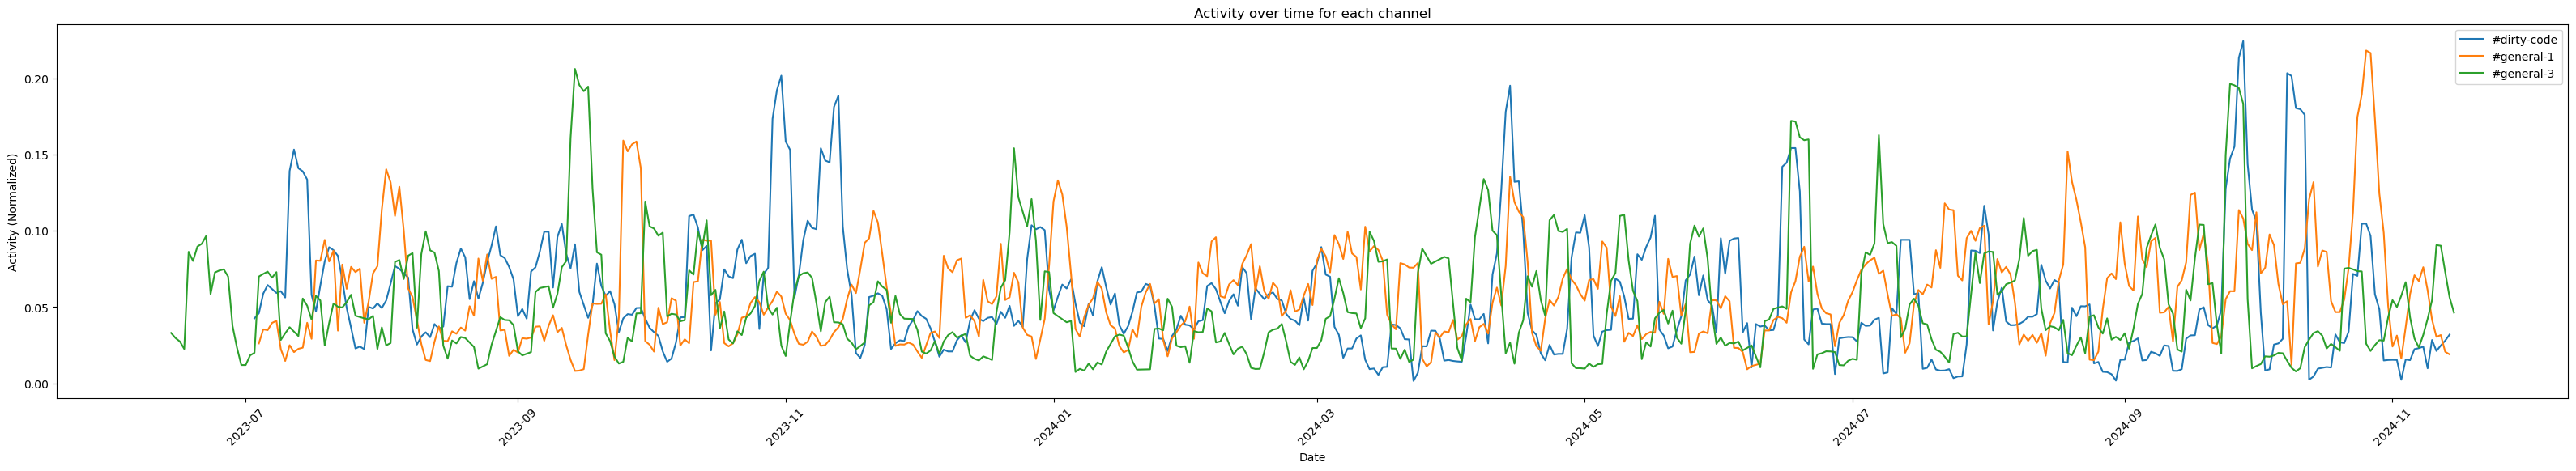

In [102]:
dates = []
channels = []
counts
from collections import defaultdict
with open("./../computed/message_over_time_per_channel.csv", "r") as f:
  reader = csv.DictReader(f)
  for row in reader:
    dates.append(datetime.strptime(row['time'], "%Y-%m-%d"))
    channels.append(row['channel'])
    counts.append(int(row['count']))


# Create a dictionary to store cumulative counts by channel
cumulative_counts = defaultdict(list)
sorted_dates = sorted(zip(dates, channels, counts), key=lambda x: x[0]) 

for date, channel, count in sorted_dates:
    cumulative_counts[channel].append((date, count))

plt.figure(figsize=(40, 6))

channel_filter = ["dirty-code", "general-1", "general-3"] 
global_max = 0
for channel, data in cumulative_counts.items():
    if channel in channel_filter:
        global_max = max(global_max, np.max([item[1] for item in data]))

time_frame_days = 500

for channel, data in cumulative_counts.items():
    if channel not in channel_filter:
        continue
    # Extract dates and counts
    channel_dates = [item[0] for item in data][-time_frame_days:]
    channel_counts = [item[1] for item in data][-time_frame_days:]

    cleaned = smooth(channel_counts / global_max, 5)
    
    plt.plot(channel_dates, cleaned, label=f'#{channel}')

# Format plot
plt.xlabel("Date")
plt.ylabel("Activity (Normalized)")
plt.title("Activity over time for each channel")
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.show()
